In [1]:
# Astropy, Astroplan install and import
#!pip install astroplan
from astroplan import Observer
from astropy.time import Time
import pytz
from astropy import constants as const
from astropy import units as u
import matplotlib.dates as mdates
# Numpy and Matplotlib import
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pylab as plt

#Setting up the time
local_tz = pytz.timezone('Europe/Warsaw')
local_tz
#Setting up the Observer in Europe/Poland/Krakow
krakow = Observer(longitude=19*u.deg + 56*u.arcmin, latitude=50*u.deg + 4 * u.arcmin, elevation=219*u.m, name="Krakow", timezone=local_tz)


In [16]:
#Checking Observer data - Krakow
#Checking Now Time
print(krakow)
nowtime = Time.now()
print(nowtime)


n = 365

<Observer: name='Krakow',
    location (lon, lat, el)=(19.933333333333334 deg, 50.06666666666667 deg, 218.99999999896366 m),
    timezone=<DstTzInfo 'Europe/Warsaw' LMT+1:24:00 STD>>
2020-12-21 12:17:37.941577


In [17]:
# TASK 1 
# "Sunrise and sunset time"
# Checking Sun and Moon rise/set time - during next year
from tqdm import tqdm
sunrise = []
sunset = []
moonrise = []
moonset = []

for i in tqdm(range(n)):
    sunrise.append(krakow.sun_rise_time(nowtime+i))
    sunset.append(krakow.sun_set_time(nowtime+i))
    moonrise.append(krakow.moon_rise_time(nowtime+i))
    moonset.append(krakow.moon_set_time(nowtime+i))

#print('Sun and Moon data set for our Observer: Europe/Poland/Krakow')
#print('')

#print('Sun rise Time:', sunrise[n-1].to_datetime(timezone=local_tz))
#print('Sun set Time:', sunset.to_datetime(timezone=local_tz))
#print('------------------------------------------')
#print('Moon rise Time:', moonrise.to_datetime(timezone=local_tz))
#print('Moon set Time:', moonset.to_datetime(timezone=local_tz))

#trying to extract data to plots
#print(sunrise[n-1].ymdhms[4])
#type(sunrise[0].to_datetime(timezone=local_tz))
#sunrise[0].to_datetime(timezone=local_tz)

100%|██████████| 365/365 [13:45<00:00,  2.26s/it]


In [18]:
#Calculations for Plotting sun and moon rise and set time
plot_time =[]
sunrise_time =[]
sunset_time =[]
moonrise_time = []
moonset_time = []

for i in tqdm(range(n)):
    plot_time.append((nowtime+i).to_datetime(timezone=local_tz))
    sunrise_time.append((float(sunrise[i].ymdhms[3]+1)*u.h+float(sunrise[i].ymdhms[4])*u.min).to_value(u.h))
    sunset_time.append((float(sunset[i].ymdhms[3]+1)*u.h+float(sunset[i].ymdhms[4])*u.min).to_value(u.h))
    try: 
        moonrise_time.append((float(moonrise[i].ymdhms[3]+1)*u.h+float(moonrise[i].ymdhms[4])*u.min).to_value(u.h))
    except:
        moonrise_time.append(0)
    try: 
        moonset_time.append((float(moonset[i].ymdhms[3]+1)*u.h+float(moonset[i].ymdhms[4])*u.min).to_value(u.h))
    except:
        moonset_time.append(0)

        
              

print(len(moonrise_time))
print(len(moonset_time))
#print(moonrise_time)


100%|██████████| 365/365 [00:00<00:00, 476.93it/s]

365
365


<function matplotlib.pyplot.show(*args, **kw)>

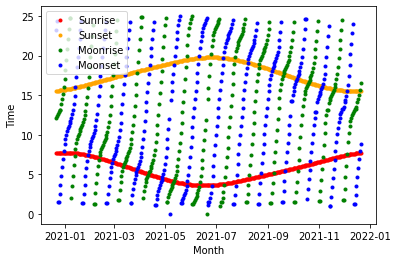

In [66]:
#Plotting sun and moon rise and set time

plt.plot(plot_time, sunrise_time, '.', label='Sunrise', color = 'red')
plt.plot(plot_time, sunset_time, '.', label='Sunset', color = 'orange')
plt.plot(plot_time, moonrise_time, '.', label='Moonrise', color = 'green')
plt.plot(plot_time, moonset_time, '.', label='Moonset', color = 'blue')


plt.xlabel('Month')
plt.ylabel('Time')

plt.legend()
plt.show

2021-06-22 14:17:37.941577+02:00


Text(2021-06-22 14:17:37.941577+02:00, 17.166666666666668, 'longest day of year:2021-06-22 14:17:37.941577+02:00')

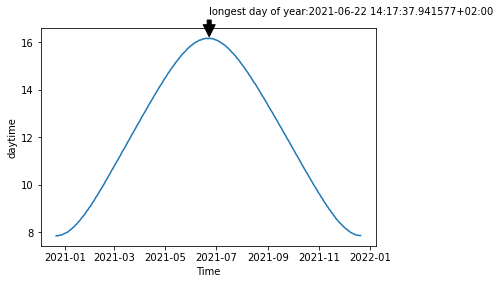

In [62]:
#day length
daytime=[]

#subtracting two lists (sunset_time - sunrise_time)
zip_object = zip(sunset_time, sunrise_time)
for sunset_i, sunrise_i in zip_object:
    daytime.append(sunset_i-sunrise_i)

ymax = max(daytime)
xpos = daytime.index(ymax)
xmax = plot_time[xpos]
print(xmax)    
    
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(plot_time, daytime)
    
plt.xlabel('Time')
plt.ylabel('daytime')

ax.annotate('longest day of year:'+ str(xmax), xy=(xmax, ymax), xytext=(xmax, ymax+1),arrowprops=dict(facecolor='black', shrink=0.07))

Text(0.5, 1.0, 'daytime contour in terms of sunset and sunrise time')

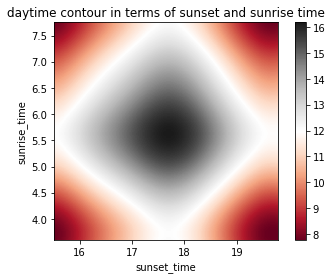

In [37]:
#contour plot for day length as a function of sunrise and sunset time
sunset=np.array(sunset_time)
sunrise=np.array(sunrise_time)
max_set=max(sunset)
min_set=min(sunset)
max_rise=max(sunrise)
min_rise=min(sunrise)
X, Y= np.meshgrid(sunset, sunrise)
Z= X-Y
#plt.contourf(X, Y, Z, 15, cmap='RdGy')
plt.imshow(Z, extent=[min_set, max_set, min_rise, max_rise], origin='lower',cmap='RdGy')
plt.colorbar()
plt.xlabel('sunset_time')
plt.ylabel('sunrise_time')
plt.title('day length contour in terms of sunset and sunrise time')

In [13]:
# TASK 2
# "Time during the day at which sun has maximum elevation"
# Checking Sun and Moon Noon/Midnight
# According to NASA site "The altitude of the Sun varies throughout the day, but it reaches its maximum altitude around noon-time."

# Here checking 3 possiblities. Nearest, previous, next. To be prepared if there is such a situation multiple times during the day
maxsun1=[]
maxsun2=[]
maxsun3=[]

maxmoon1=[]
maxmoon2=[]
maxmoon3=[]


for i in tqdm(range(n)):
    maxsun1.append(krakow.noon(nowtime+i, which='nearest', n_grid_points=75))
    maxsun2.append(krakow.noon(nowtime+i, which='previous', n_grid_points=75))
    maxsun3.append(krakow.noon(maxsun1[i].utc, which='next' ,n_grid_points=10))
print('Time for the nearest act "Sun to be in maximum elevation:"', maxsun1[n-1].to_datetime(timezone=local_tz))
print('Time for the previous act "Sun to be in maximum elevation:"', maxsun2[n-1].to_datetime(timezone=local_tz))
#print('Time for the next act "Sun to be in maximum elevation:"', maxsun3[n-1].to_datetime(timezone=local_tz))

print('------------------------------------------')
# TAKS 2 ad.2
# Same operations but for Moon
# Checking the time of solar midnight. At this point Moon reaches maximum altitude
for i in tqdm(range(n)):
    maxmoon1.append(krakow.midnight(nowtime+i, which='nearest', n_grid_points=75))
    maxmoon2.append(krakow.midnight(nowtime+i, which='previous', n_grid_points=75))
    maxmoon3.append(krakow.midnight(maxmoon1[i].utc, which='next', n_grid_points=10))
print('Time for the nearest act "Moon to be in maximum elevation:"', maxmoon1[n-1].to_datetime(timezone=local_tz))
print('Time for the previous act "Moon to be in maximum elevation:"', maxmoon2[n-1].to_datetime(timezone=local_tz))
#print('Time for the next act "Moon to be in maximum elevation:"', maxmoon3[n-1].to_datetime(timezone=local_tz))


  0%|▏                                                                                 | 1/365 [00:00<01:08,  5.32it/s]

Time for the nearest act "Sun to be in maximum elevation:" 2021-12-15 11:35:24.464625+01:00
Time for the previous act "Sun to be in maximum elevation:" 2021-12-15 11:35:24.464625+01:00
------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 365/365 [01:14<00:00,  4.88it/s]

Time for the nearest act "Moon to be in maximum elevation:" 2021-12-15 23:35:43.930744+01:00
Time for the previous act "Moon to be in maximum elevation:" 2021-12-14 23:35:15.325668+01:00


100%|██████████████████████████████████████████████████████████████████████████████| 365/365 [00:00<00:00, 1357.71it/s]


365
365


<function matplotlib.pyplot.show(close=None, block=None)>

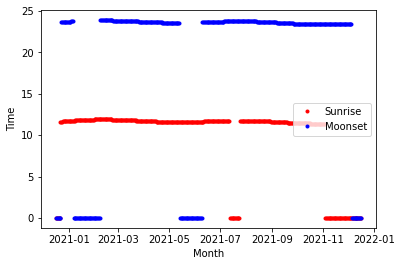

In [14]:
#Plotting Time during the day at which sun and moon has maximum elevation
maxsun = []
maxmoon = []

for i in tqdm(range(n)):
    try:
        maxsun.append((float(maxsun3[i].ymdhms[3]+1)*u.h+float(maxsun3[i].ymdhms[4])*u.min).to_value(u.h))
    except:
        maxsun.append(0)
    
    try:
        maxmoon.append((float(maxmoon3[i].ymdhms[3]+1)*u.h+float(maxmoon3[i].ymdhms[4])*u.min).to_value(u.h))
    except:
        maxmoon.append(0)

print(len(maxmoon))
print(len(maxsun))        
        

plt.plot(plot_time, maxsun, '.', label='Sunrise', color = 'red')
plt.plot(plot_time, maxmoon, '.', label='Moonset', color = 'blue')


plt.xlabel('Month')
plt.ylabel('Time')


plt.legend()
plt.show

In [ ]:
# TASK 3
# Maximum elevation on the sky for Sun and Moon.

result_maxsun = krakow.sun_altaz(maxsun[1])
result_maxsun2 = krakow.sun_altaz(maxsun2[1])
result_maxsun3 = krakow.sun_altaz(maxsun3[1])

result_maxmoon = krakow.moon_altaz(maxmoon[1])
result_maxmoon2 = krakow.moon_altaz(maxmoon2[1])
result_maxmoon3 = krakow.moon_altaz(maxmoon3[1])

print('Maximum Sun elevation in the nearest time:', result_maxsun.alt.to(u.deg))
print('Maximum Sun elevation in the previous time:', result_maxsun2.alt.to(u.deg))
print('Maximum Sun elevtation in the next time:', result_maxsun3.alt.to(u.deg))
print('------------------------------------------')
print('Maximum Moon elevtation in the nearest time:',  result_maxmoon.alt.to(u.deg))
print('Maximum Moon elevtation in the previous time:', result_maxmoon2.alt.to(u.deg))
print('Maximum Moon elevtation in the next time:', result_maxmoon3.alt.to(u.deg))





In [ ]:
#Plotting maximum elevation result_maxsun3 and result_maxmoon3
plot_time =[]
labels_time =[]
for i in range(n):
    plot_time.append(ar_time[i].to_datetime(timezone=local_tz))
    labels_time.append(str(ar_time[i].ymdhms[0]) +'-'+str(ar_time[i].ymdhms[1])+'-'+str(ar_time[i].ymdhms[2]))


plt.xticks(plot_time, labels_time, rotation='vertical')
plt.xlabel('Day')
plt.ylabel('Maximum elevation on the sky for Sun in deg')
plt.plot(plot_time, result_maxsun3.alt.to(u.deg))
plt.show

plt.xticks(plot_time, labels_time, rotation='vertical')
plt.xlabel('Day')
plt.ylabel('Maximum elevation on the sky for Moon in deg')
plt.plot(plot_time, result_maxmoon3.alt.to(u.deg))


In [ ]:
# TASK 4 & 5
# Azimuth of the point on the horizon where Sun/Moon is rising
# Azimuth of the point on the horizon where Sun/Moon is setting

#Below the code form TASK 1
#sunrise = krakow.sun_rise_time(nowtime)
#sunset = krakow.sun_set_time(nowtime)
#moonrise = krakow.moon_rise_time(nowtime)
#moonset = krakow.moon_set_time(nowtime)

result_sunrise = krakow.sun_altaz(sunrise)
result_sunset = krakow.sun_altaz(sunset)
result_moonrise = krakow.moon_altaz(moonrise)
result_moonset = krakow.moon_altaz(moonset)

print('Azimuth of the point on the horizon where Sun is rising:', result_sunrise.az)
print('Azimuth of the point on the horizon where Sun is setting:', result_sunset.az)
print('------------------------------------------')
print('Azimuth of the point on the horizon where Moon is rising:', result_moonrise.az)
print('Azimuth of the point on the horizon where Moon is setting:', result_moonset.az)